# MNIST CNN

[source1](https://github.com/julienr/ipynb_playground/blob/master/keras/convmnist/keras_cnn_mnist.ipynb)
[source2](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/mnist.ipynb)



In [33]:
from theano.sandbox import cuda
cuda.use('gpu2')

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.


In [34]:
import theano
print(theano.config.device)

cpu


In [35]:
%matplotlib inline

from __future__ import division, print_function
from matplotlib import pyplot as plt
import numpy as np
import pylab as pl
import matplotlib.cm as cm

## Setup

In [36]:
batch_size=64

In [37]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing import image, sequence

In [38]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [39]:
X_test = np.expand_dims(X_test,1)
X_train = np.expand_dims(X_train,1)

In [40]:
X_train.shape

(60000, 1, 28, 28)

In [41]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [42]:
def onehot(x):
    return np_utils.to_categorical(x)

y_train = onehot(y_train)
y_test = onehot(y_test)

In [43]:
y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

label :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


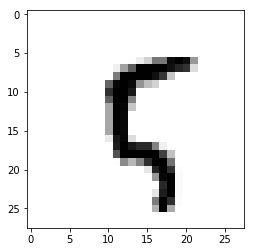

In [44]:
i = 100
pl.imshow(X_train[i, 0], interpolation='nearest', cmap=cm.binary)
print("label : ", y_train[i,:])

In [45]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def norm_input(x): return (x-mean_px)/std_px

## Basic 'VGG-style' CNN

In [53]:
from keras import backend as K
K.set_image_dim_ordering('th')
def get_model():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28)),
        Convolution2D(32,3,3, activation='relu'),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,3,3, activation='relu'),
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [54]:
model = get_model()

/Users/iacutone/anaconda3/lib/python3.6/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_7 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [59]:
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=64)
test_batches = gen.flow(X_test, y_test, batch_size=64)

In [61]:
model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 190s - loss: 0.1172 - acc: 0.9633 - val_loss: 0.0381 - val_acc: 0.9891

In [62]:
model.optimizer.lr=0.1

In [63]:
model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 260s - loss: 0.0345 - acc: 0.9897 - val_loss: 0.0266 - val_acc: 0.9913

In [64]:
# this would take forever on my laptop
# model.optimizer.lr=0.01
# model.fit_generator(batches, batches.N, nb_epoch=8, 
#                     validation_data=test_batches, nb_val_samples=test_batches.N)